## Import Package

In [124]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

## Load Dataset

In [125]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [126]:
df=boston

## Data Preprocessing (20 point)

### Missing Value

In [127]:
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [128]:
df.duplicated().sum()

0

In [129]:
df.isnull().sum()
df[['CHAS']].value_counts()

CHAS
0.0     471
1.0      35
dtype: int64

Looks like only `Chas` have Categorical data type

### Outlier Handling

In [130]:
features  = list(df)[:-1]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

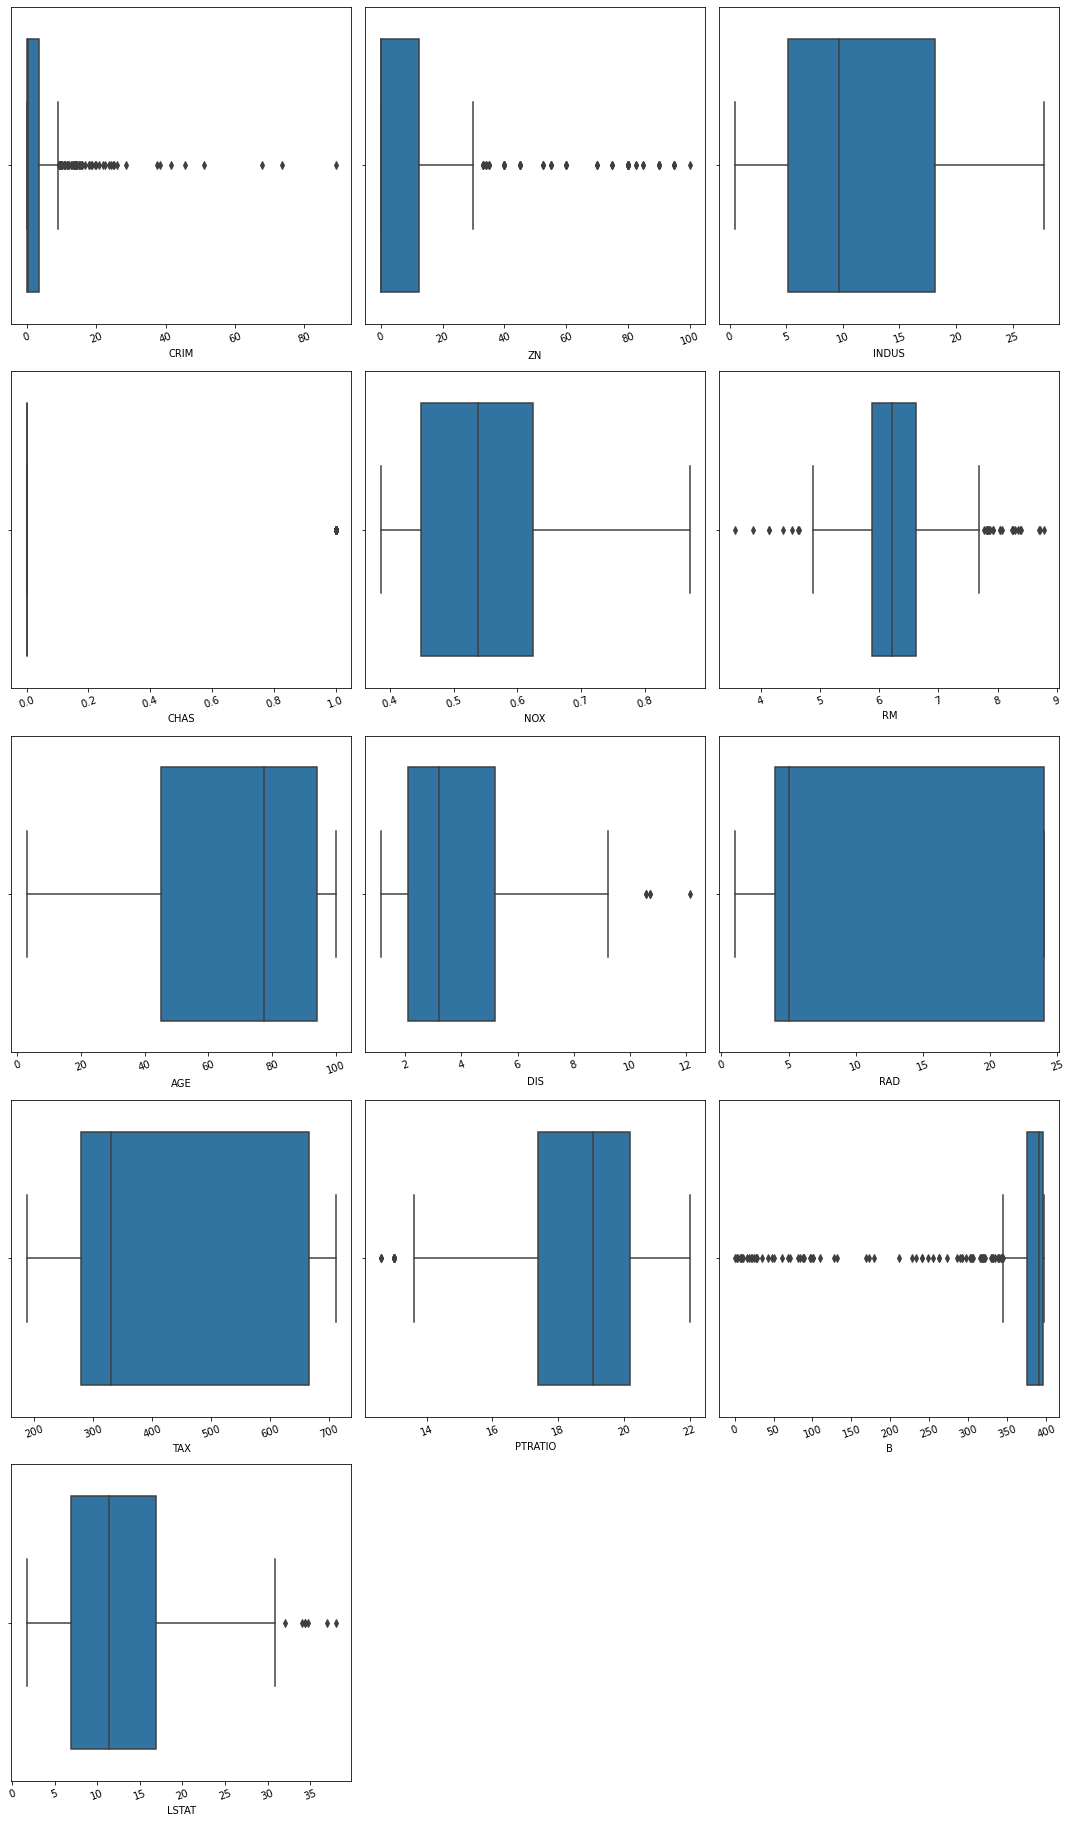

In [131]:
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(6, 3,i[0]+1)
    sns.boxplot(i[1], data = df)
    plt.xticks(rotation = 20)
plt.tight_layout()

In [132]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [133]:
outlier_features =['CRIM',
 'ZN',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'PTRATIO',
 'B',
 'LSTAT']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

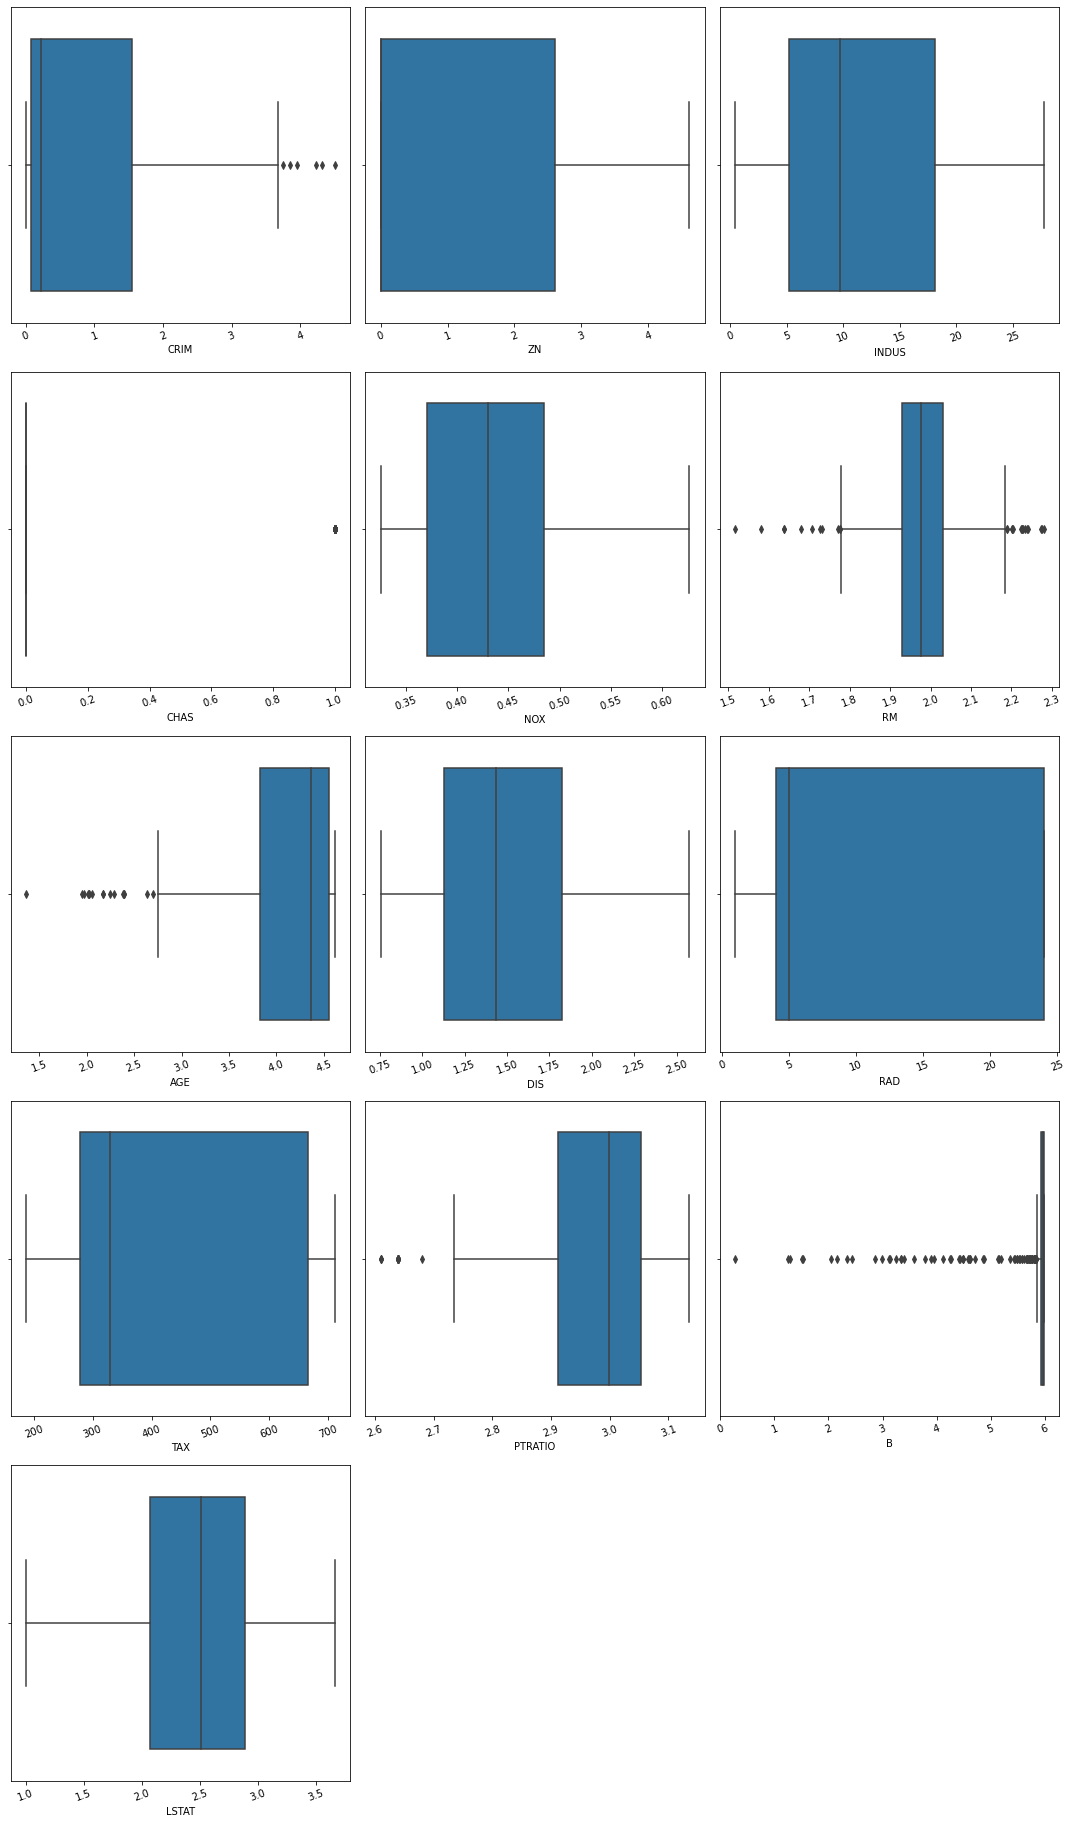

In [134]:
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(6, 3,i[0]+1)
    sns.boxplot(i[1], data = df)
    plt.xticks(rotation = 20)
plt.tight_layout()

### Multicolinearity Handling

<AxesSubplot:>

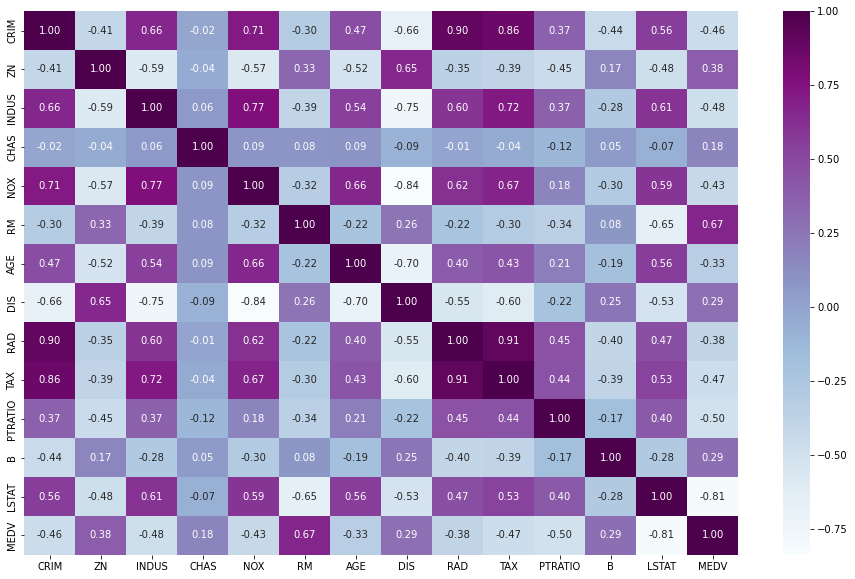

In [135]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,8.351392
2,ZN,2.359106
3,INDUS,4.067483
4,CHAS,1.097130
5,NOX,5.345895
6,RM,2.104232
7,AGE,2.389120
8,DIS,5.715209
9,RAD,11.938784
10,TAX,8.826905


In [137]:
df=df.drop(columns=['RAD','CRIM','NOX'])


In [138]:
X = add_constant(df)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,ZN,2.334542
2,INDUS,3.603288
3,CHAS,1.083168
4,RM,2.088386
5,AGE,2.316772
6,DIS,4.235309
7,TAX,2.723358
8,PTRATIO,1.745903
9,B,1.237585
10,LSTAT,4.806414


<AxesSubplot:>

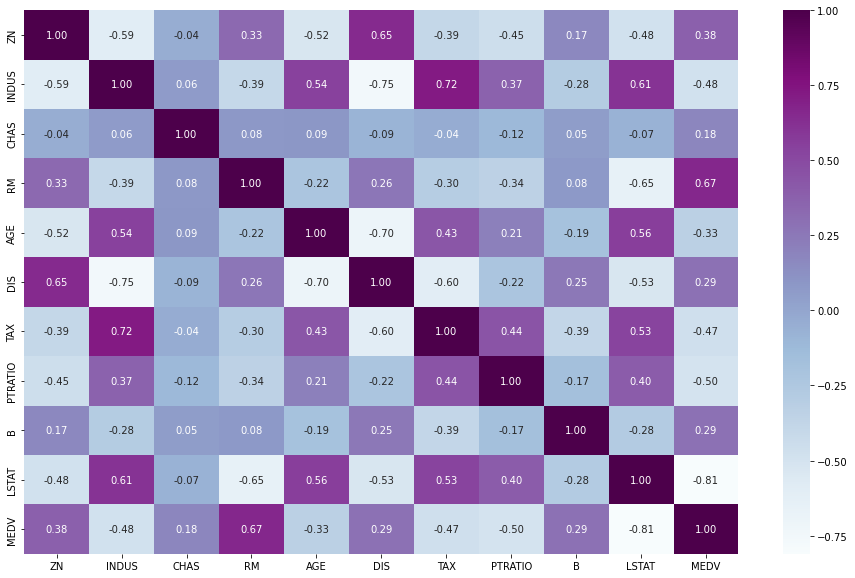

In [139]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

### Feature + Target

In [140]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

### Scaling

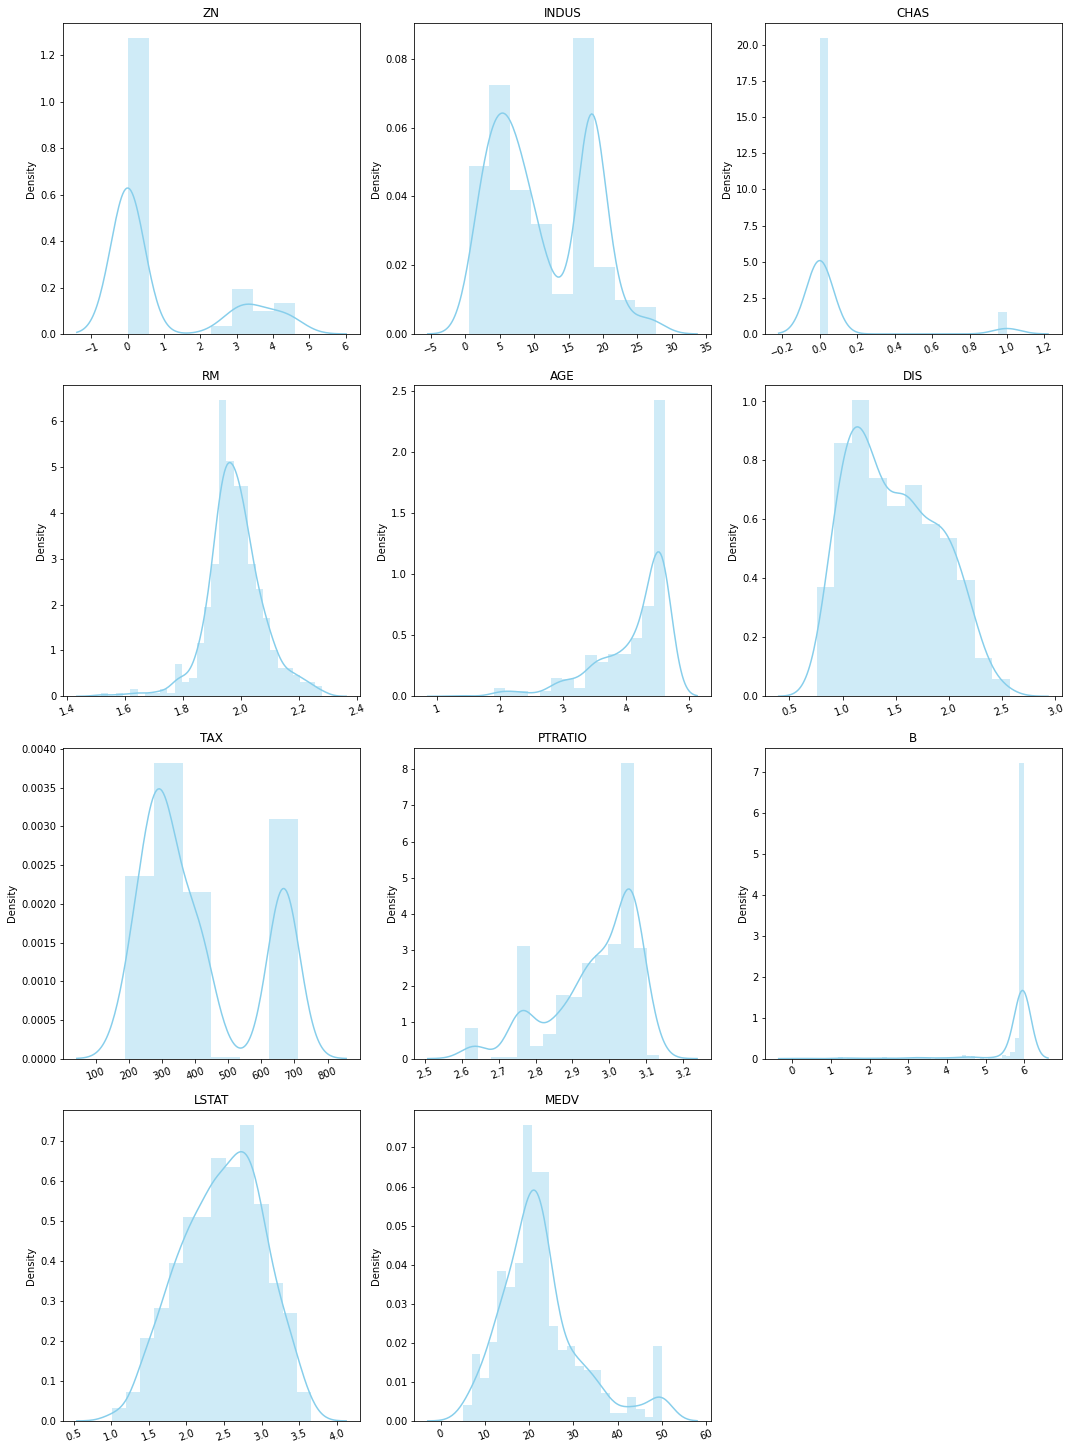

In [141]:
plt.figure(figsize = (15, 30))
for i in enumerate(df):
    plt.subplot(6, 3,i[0]+1)
    sns.distplot(x=df[[i[1]]], color='skyblue').set(title=i[1])
    plt.xticks(rotation = 20)
plt.tight_layout()

most of our feature distribution not normal so i decide to use standardscaler

In [142]:
df

,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,2.944439,2.31,0.0,2.024853,4.192680,1.627278,296.0,2.791165,5.986201,1.788421,24.0
1,0.000000,7.07,0.0,2.004314,4.380776,1.786261,242.0,2.933857,5.986201,2.316488,21.6
2,0.000000,7.07,0.0,2.102303,4.128746,1.786261,242.0,2.933857,5.975919,1.615420,34.7
3,0.000000,2.18,0.0,2.079192,3.845883,1.954757,222.0,2.980619,5.980479,1.371181,33.4
4,0.000000,2.18,0.0,2.097650,4.010963,1.954757,222.0,2.980619,5.986201,1.845300,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.000000,11.93,0.0,2.027227,4.249923,1.246630,273.0,3.091042,5.973784,2.367436,22.4
502,0.000000,11.93,0.0,1.962908,4.352855,1.190127,273.0,3.091042,5.986201,2.310553,20.6
503,0.000000,11.93,0.0,2.076437,4.521789,1.152943,273.0,3.091042,5.986201,1.893112,23.9
504,0.000000,11.93,0.0,2.053354,4.503137,1.220505,273.0,3.091042,5.977492,2.012233,22.0


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
df=pd.DataFrame(data=X_std,columns=(list(df))[:-1])
df['MEDV'] = y
df

,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,1.229330,-1.287909,-0.272599,0.453447,0.136758,0.357474,-0.666608,-1.445535,0.311086,-1.276118,24.0
1,-0.589091,-0.593381,-0.272599,0.240390,0.456001,0.742438,-0.987329,-0.234324,0.311086,-0.295491,21.6
2,-0.589091,-0.593381,-0.272599,1.256834,0.028245,0.742438,-0.987329,-0.234324,0.296977,-1.597382,34.7
3,-0.589091,-1.306878,-0.272599,1.017096,-0.451842,1.150436,-1.106115,0.162604,0.303235,-2.050937,33.4
4,-0.589091,-1.306878,-0.272599,1.208564,-0.171661,1.150436,-1.106115,0.162604,0.311086,-1.170492,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.589091,0.115738,-0.272599,0.478066,0.233912,-0.564233,-0.803212,1.099915,0.294047,-0.200880,22.4
502,-0.589091,0.115738,-0.272599,-0.189116,0.408613,-0.701049,-0.803212,1.099915,0.311086,-0.306512,20.6
503,-0.589091,0.115738,-0.272599,0.988524,0.695334,-0.791089,-0.803212,1.099915,0.311086,-1.081705,23.9
504,-0.589091,0.115738,-0.272599,0.749086,0.663679,-0.627491,-0.803212,1.099915,0.299136,-0.860496,22.0


# PCA

## Principle Components

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,MEDV
0,2.323009,0.544978,0.269699,-0.762036,0.799769,-0.020644,-0.328911,0.835432,-0.249839,-0.012495,24.0
1,0.820531,0.021166,-0.502236,-0.584085,-0.193700,1.063075,-0.074587,-0.098494,-0.087394,-0.588667,21.6
2,1.721488,0.567811,0.207094,-0.804660,-1.159233,0.811730,0.313714,0.181750,0.038234,-0.680220,34.7
3,2.385396,0.047414,0.103611,-0.399658,-1.541352,1.042574,0.396673,0.556393,-0.282053,-0.606312,33.4
4,2.008000,0.035521,0.012193,-0.483357,-1.268223,1.202865,-0.054885,-0.077547,-0.345715,-0.456831,36.2


### Skree Plot

In [145]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [4.51593391 1.26414884 1.02142678 0.80450526 0.77492571 0.58433135
 0.45473793 0.23038647 0.201217   0.16818873]
Explained variance ratio: [45.07009144 12.61650519 10.19408146  8.02915331  7.73394237  5.83176544
  4.53839235  2.29931164  2.00819342  1.6785634 ]


<BarContainer object of 10 artists>

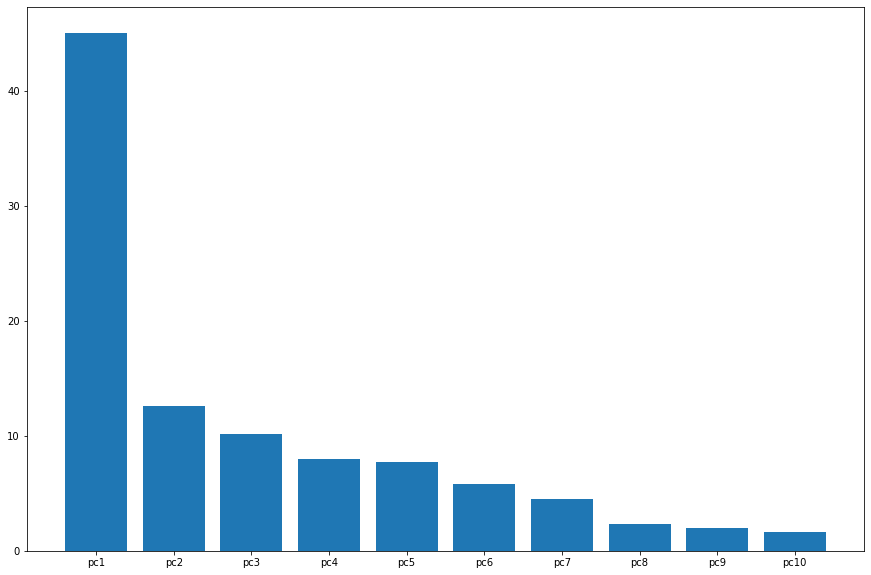

In [146]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'], pca.explained_variance_ratio_ * 100)

### Reduksi Feature

In [147]:
pca = PCA(n_components=5)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2','pc3', 'pc4','pc5'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,MEDV
0,2.323009,0.544978,0.269699,-0.762036,0.799769,24.0
1,0.820531,0.021166,-0.502236,-0.584085,-0.193700,21.6
2,1.721488,0.567811,0.207094,-0.804660,-1.159233,34.7
3,2.385396,0.047414,0.103611,-0.399658,-1.541352,33.4
4,2.008000,0.035521,0.012193,-0.483357,-1.268223,36.2


# Regression Model

## Without PC

### Split Data Set

In [148]:
feature=df.drop('MEDV',axis=1)
target=df[['MEDV']]
ftr_pretrain, ftr_test,tgt_pretrain,tgt_test=train_test_split(feature,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

ftr_train, ftr_validation, tgt_train, tgt_validation = train_test_split(ftr_pretrain, tgt_pretrain, test_size=0.20, random_state=42)

### Model Training

In [149]:
from sklearn.linear_model import Ridge

# train the model
X_train = ftr_train.to_numpy()
y_train = tgt_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [150]:
from sklearn.metrics import mean_squared_error

X_validation = ftr_validation.to_numpy()
y_validation = tgt_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.279638283303534
RMSE of Ridge regression model with alpha = 0.1 is 4.2797255412095385
RMSE of Ridge regression model with alpha = 1.0 is 4.280669443136747
RMSE of Ridge regression model with alpha = 10 is 4.2954865516204315


In [151]:
ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + ftr_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.383298
1,ZN,0.326346
2,INDUS,-0.781381
3,CHAS,0.668343
4,RM,2.262274
5,AGE,0.177134
6,DIS,-2.562232
7,TAX,-0.770424
8,PTRATIO,-1.271081
9,B,0.919536


### Diagnostic Study

In [152]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))


R-squared for training data is 0.7138277295791371


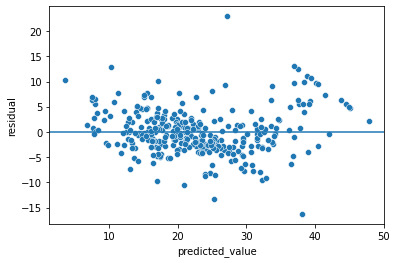

In [153]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

## With PC

### Split Data Set

In [154]:
feature=X_std_pca.drop('MEDV',axis=1)
target=X_std_pca[['MEDV']]
pca_ftr_pretrain,pca_ftr_test,pca_tgt_pretrain,pca_tgt_test=train_test_split(feature,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

pca_ftr_train, pca_ftr_validation, pca_tgt_train, pca_tgt_validation = train_test_split(pca_ftr_pretrain, pca_tgt_pretrain, test_size=0.20, random_state=42)

### Model Training

In [155]:
from sklearn.linear_model import Ridge

# train the model
pca_X_train = pca_ftr_train.to_numpy()
pca_y_train = pca_tgt_train.to_numpy()
pca_y_train = pca_y_train.reshape(len(pca_y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(pca_X_train, pca_y_train)
ridge_reg_pointone.fit(pca_X_train, pca_y_train)
ridge_reg_one.fit(pca_X_train, pca_y_train)
ridge_reg_ten.fit(pca_X_train, pca_y_train)

Ridge(alpha=10, random_state=42)

In [156]:
from sklearn.metrics import mean_squared_error

pca_X_validation = pca_ftr_validation.to_numpy()
pca_y_validation = pca_tgt_validation.to_numpy()
pca_y_validation = pca_y_validation.reshape(len(pca_y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    pca_y_predict_validation = model.predict(pca_X_validation)
    rmse = np.sqrt(mean_squared_error(pca_y_validation,pca_y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.992262957327643
RMSE of Ridge regression model with alpha = 0.1 is 4.992127427278822
RMSE of Ridge regression model with alpha = 1.0 is 4.990787348504354
RMSE of Ridge regression model with alpha = 10 is 4.978843986454682


In [157]:
pca_ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + pca_ftr_train.columns.tolist(),
    'coefficient':[pca_ridge_best.intercept_] + list(pca_ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.380256
1,pc1,2.847319
2,pc2,3.869116
3,pc3,1.014860
4,pc4,-1.933673
5,pc5,-2.181641


### Diagnostic Study

In [158]:
from sklearn.metrics import r2_score

pca_y_predict_train = pca_ridge_best.predict(pca_X_train)

print('R-squared for training data is {}'.format(r2_score(pca_y_predict_train, pca_y_train)))


R-squared for training data is 0.6404888806516753


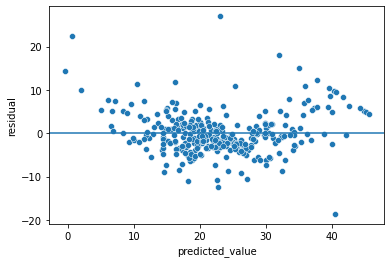

In [159]:
# calculate residuals
residual = pca_y_train - pca_y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': pca_y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

# Predicting

## Without PC

### Training Error

In [160]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_train)

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train)))

RMSE for training data is 4.488164937079002
MAE for training data is 3.3397009569124987
MAPE for training data is 0.16970452335951405


### Testing eror

In [162]:
# prepare prediction result on test data
X_test = ftr_test.to_numpy()
y_predict_test  = ridge_best.predict(X_test)

# ground truth target
y_test = tgt_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [163]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))

RMSE for testing data is 4.64879952164867
MAE for testing data is 3.01528223513114
MAPE for testing data is 0.2363423843403185


## With PC

### Training Error

In [164]:
# prepare prediction result on train data
pca_y_predict_train = pca_ridge_best.predict(pca_X_train)

In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(pca_y_predict_train, pca_y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(pca_y_predict_train, pca_y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(pca_y_predict_train, pca_y_train)))

RMSE for training data is 4.8954487083031
MAE for training data is 3.489688541476969
MAPE for training data is 0.37933037088797505


### Testing eror

In [166]:
# prepare prediction result on test data
pca_X_test = pca_ftr_test.to_numpy()
pca_y_predict_test  = pca_ridge_best.predict(pca_X_test)

# ground truth target
pca_y_test = pca_tgt_test.to_numpy()
pca_y_test = pca_y_test.reshape(len(pca_y_test),)

In [167]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(pca_y_predict_test, pca_y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(pca_y_predict_test, pca_y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(pca_y_predict_test, pca_y_test)))

RMSE for testing data is 5.396183638432491
MAE for testing data is 3.187463289145167
MAPE for testing data is 1.5575605495087192


# Evaluation

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

In [205]:
print('R2 Score')
print('R2 Score is {} while with PCA is {}'.format(r2_score(y_predict_train, y_train),r2_score(pca_y_predict_train, pca_y_train)))
print('\nTraining Error')
print('RMSE for testing data is {} while with PCA is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train)),(np.sqrt(mean_squared_error(pca_y_predict_train, pca_y_train)))))
print('MAE for training data is {} while with PCA is {}'.format(mean_absolute_error(y_predict_train, y_train),(mean_absolute_error(pca_y_predict_train, pca_y_train))))
print('MAPE for training data is {} while with PCA is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train),mean_absolute_percentage_error(pca_y_predict_train,pca_y_train)))
print('\nTesting Error')
print('RMSE for testing data is {} while with PCA is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test)),(np.sqrt(mean_squared_error(pca_y_predict_test, pca_y_test)))))
print('MAE for training data is {} while with PCA is {}'.format(mean_absolute_error(y_predict_test, y_test),(mean_absolute_error(pca_y_predict_test, pca_y_test))))
print('MAPE for training data is {} while with PCA is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test),mean_absolute_percentage_error(pca_y_predict_test, pca_y_test)))



R2 Score
R2 Score is 0.7138277295791371 while with PCA is 0.6404888806516753

Training Error
RMSE for testing data is 4.488164937079002 while with PCA is 4.8954487083031
MAE for training data is 3.3397009569124987 while with PCA is 3.489688541476969
MAPE for training data is 0.16970452335951405 while with PCA is 0.37933037088797505

Testing Error
RMSE for testing data is 4.64879952164867 while with PCA is 5.396183638432491
MAE for training data is 3.01528223513114 while with PCA is 3.187463289145167
MAPE for training data is 0.2363423843403185 while with PCA is 1.5575605495087192


Conclussion
* from R2 score using PCA indicate lower than without using it
* while using PCA both Training and Testing Error have higher RMSE,MAE,and MAPE
* in this case it seems using PCA worst than whitout using it, it's better we dont use PCA, May be for other case using pca will rise the accuracy